📝 Ejemplo Práctico con Python

Usaremos el dataset Students Performance (el mismo que antes).

1️⃣ Cargar el dataset y explorar datos

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

# Cargar datos
df = pd.read_csv("../data/StudentsPerformance.csv")

# Ver las primeras filas
print(df.head())

# Ver correlaciones
correlaciones = df[['math score', 'reading score', 'writing score']].corr()
print(correlaciones)


   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
               math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       

2️⃣ Calcular la Correlación

Coeficiente de correlación: 0.8176, Valor p: 0.0000


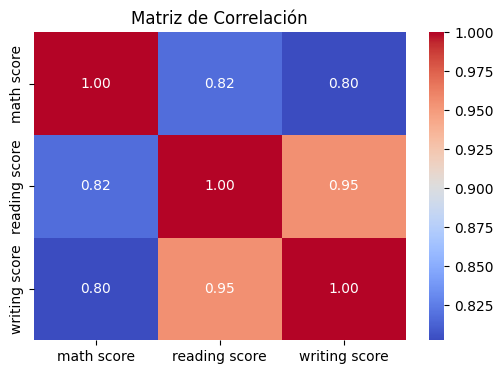

In [6]:
# Correlación entre matemáticas y lectura
r, p_value = pearsonr(df["math score"], df["reading score"])

print(f"Coeficiente de correlación: {r:.4f}, Valor p: {p_value:.4f}")

# Visualizar con un heatmap
plt.figure(figsize=(6,4))
sns.heatmap(correlaciones, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

📌 Interpretación:
- Si r está cerca de 1 o -1, hay una fuerte relación.
- Si p-value < 0.05, la correlación es estadísticamente significativa.

3️⃣ Ajustar un Modelo de Regresión Lineal

📌 Pregunta: ¿Podemos predecir la calificación en escritura con la calificación en matemáticas?

In [7]:
# Definir variables
X = df[["math score"]]  # Variable independiente
y = df["writing score"]  # Variable dependiente

# Crear el modelo
modelo = LinearRegression()
modelo.fit(X, y)

# Obtener coeficientes
b0 = modelo.intercept_
b1 = modelo.coef_[0]

print(f"Ecuación de regresión: Y = {b0:.2f} + {b1:.2f}X")

Ecuación de regresión: Y = 14.89 + 0.80X


4️⃣ Hacer Predicciones

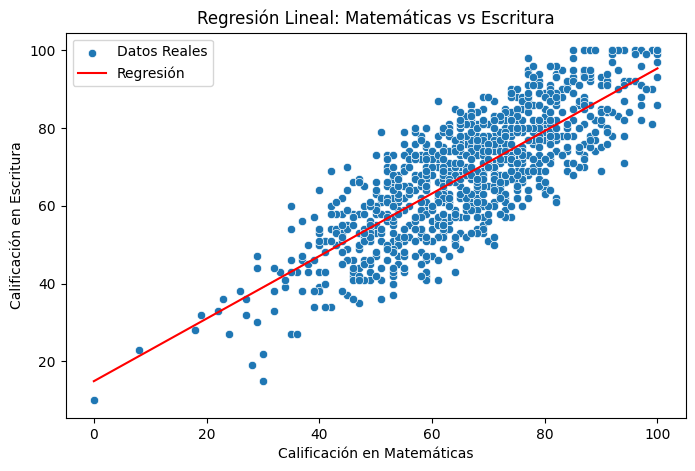

In [8]:
# Hacer predicciones
df["Predicción escritura"] = modelo.predict(X)

# Graficar la regresión
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["math score"], y=df["writing score"], label="Datos Reales")
sns.lineplot(x=df["math score"], y=df["Predicción escritura"], color="red", label="Regresión")
plt.xlabel("Calificación en Matemáticas")
plt.ylabel("Calificación en Escritura")
plt.title("Regresión Lineal: Matemáticas vs Escritura")
plt.legend()
plt.show()


📌 Interpretación:
- La línea roja muestra la tendencia.
- Si los puntos están cerca de la línea → buena predicción.
- Si están dispersos → el modelo no es bueno.


5️⃣ Evaluar el Modelo

In [9]:
from sklearn.metrics import mean_squared_error, r2_score

# Métricas de rendimiento
mse = mean_squared_error(y, df["Predicción escritura"])
r2 = r2_score(y, df["Predicción escritura"])

print(f"Error cuadrático medio (MSE): {mse:.4f}")
print(f"Coeficiente de determinación (R²): {r2:.4f}")

Error cuadrático medio (MSE): 82.0670
Coeficiente de determinación (R²): 0.6442


📌 Interpretación:
- MSE bajo → Mejor modelo (menor error).
- R² cerca de 1 → El modelo explica bien la variabilidad.